## Load data

In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import pandas as pd # type: ignore
from tqdm import tqdm # type: ignore

dataset: Dataset = Dataset.load(f'{PROJECT_ROOT}/data/dataset.tsv')

## Data exploration

### Class distribution

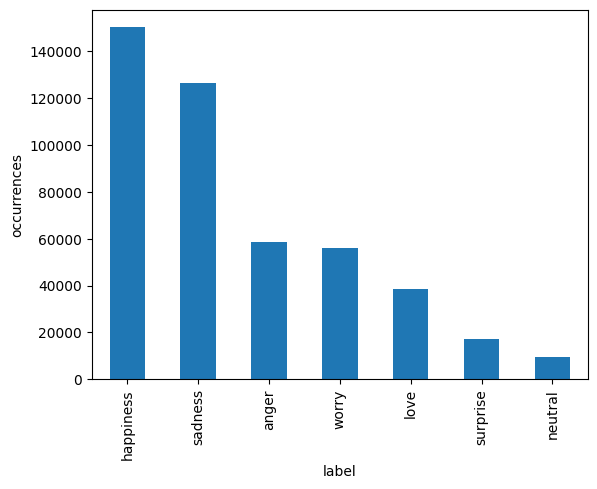

In [2]:
dataset.data['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')
plt.show()

### Length distribution

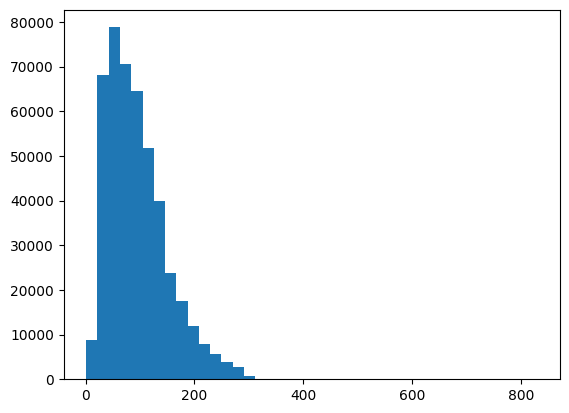

In [3]:
plt.hist([len(x) for x in dataset.data['text']], bins=40)
plt.show()

## Preprocessing

In [4]:
from dmml_project.preprocessor import Preprocessor
from dmml_project import PROJECT_ROOT

pp: Preprocessor = Preprocessor.load(f"{PROJECT_ROOT}/data/preprocessor/tfidf.pkl")

In [5]:
random_examples = dataset.data['text'].sample(5)
print("Before preprocessing:")
print(random_examples)
print("After preprocessing:")
print(pp(random_examples))

Before preprocessing:
360856    i am currently witnessig myself feeling annoye...
240551       i don t feel threatened by them just irritated
246709    i have a feeling palin supporters might be ple...
435947    i feel like one of those fucked up spoilt brat...
231586    ive often found myself feeling pressured to fi...
Name: text, dtype: object
After preprocessing:
  (0, 1905)	0.5906038726623688
  (0, 10609)	0.32704096151090756
  (0, 15793)	0.051818142793995846
  (0, 25873)	0.34635423097072426
  (0, 32042)	0.2720328126248708
  (0, 42608)	0.27676292615047615
  (0, 48889)	0.2686585733329586
  (0, 50593)	0.189044199477622
  (0, 52011)	0.40381950799693334
  (1, 15793)	0.12108473996466118
  (1, 23266)	0.6522726450742713
  (1, 47194)	0.7482505477682618
  (2, 15793)	0.06675254735066108
  (2, 29658)	0.343342704443871
  (2, 34312)	0.6810404692106462
  (2, 35884)	0.39991098151789767
  (2, 45469)	0.33135051544284816
  (2, 45526)	0.37963377984823693
  (3, 5837)	0.4747010790322201
  (3, 15793)	0.0

In [6]:
violin_plot_data = dataset.data.copy()
violin_plot_data['len'] = violin_plot_data['text'].apply(lambda x: len(x))

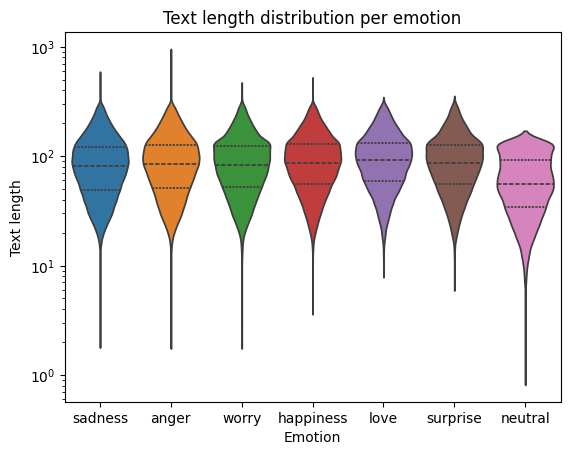

In [7]:
sns.violinplot(data=violin_plot_data, x='label', y='len', hue='label', inner='quartile', log_scale=True).set_title('Text length distribution per emotion')
plt.xlabel('Emotion')
plt.ylabel('Text length')
plt.show()